In [1]:
import os
import requests
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
api_key = os.environ["ALPHA_API_KEY"]
response = requests.get(f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=IBM&apikey={api_key}")
json = response.json()

In [4]:
metadata = json["Meta Data"]
monthly_time_series = json["Monthly Time Series"]

In [5]:
df = pd.DataFrame.from_dict(monthly_time_series, orient='index')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [6]:
df = df.rename(columns={
    '1. open': 'open',
    '2. high': 'high',
    '3. low': 'low',
    '4. close': 'close',
    '5. volume': 'volume'
})

In [7]:
this_year = df.loc['2024-01-31':'2024-10-11']

In [8]:
this_year

,open,high,low,close,volume
2024-01-31,162.8300,196.9000,157.8850,183.6600,128121557
2024-02-29,183.6300,188.9500,178.7500,185.0300,88679550
2024-03-28,185.4900,199.1800,185.1800,190.9600,99921776
2024-04-30,190.0000,193.2800,165.2605,166.2000,98297181
2024-05-31,165.6900,175.4600,162.6200,166.8500,78620355
2024-06-28,166.5400,178.4599,163.5300,172.9500,70706301
2024-07-31,173.4500,196.2600,173.3800,192.1400,81258646
2024-08-30,192.8100,202.1700,181.8100,202.1300,65453729
2024-09-30,201.9100,224.1500,199.3350,221.0800,83415811
2024-10-11,220.6300,235.8300,215.7980,233.2600,32632579


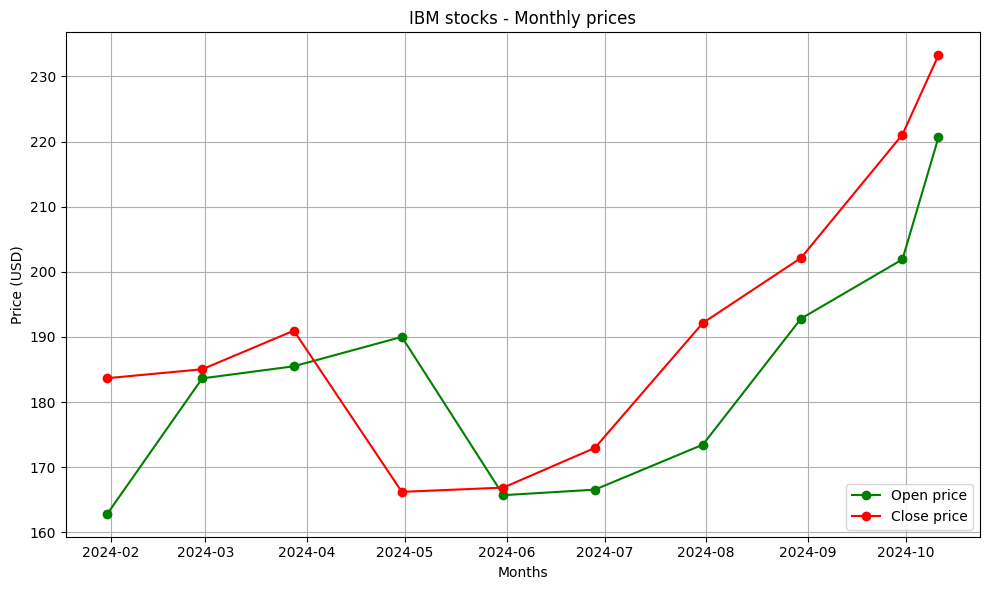

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(this_year.index, this_year["open"].astype("float"), marker="o", linestyle='-', color='g', label='Open price')
ax.plot(this_year.index, this_year["close"].astype("float"), marker="o", linestyle='-', color='r', label='Close price')

ax.set_title("IBM stocks - Monthly prices")
ax.set_xlabel("Months")
ax.set_ylabel("Price (USD)")

plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("ibm_stocks_monthly_prices.png", dpi=300)
plt.show()